In [3]:
import os 
import requests 
import scipy.io as sio
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from rbm import RBM
from utils_projet import lire_alpha_digit, sigmoid
from principal_RBM_alpha import init_RBM, entree_sortie_RBM,\
                                sortie_entree_RBM, train_RBM,\
                                generer_image_RBM

# Entrainer le RBM

File already downloaded, using version in data folder..
Epoch: 0 -- Erreur de reconstruction: 0.3090544871794872
Epoch: 1 -- Erreur de reconstruction: 0.26666666666666666
Epoch: 2 -- Erreur de reconstruction: 0.234375
Epoch: 3 -- Erreur de reconstruction: 0.20376602564102564
Epoch: 4 -- Erreur de reconstruction: 0.19663461538461538
Epoch: 5 -- Erreur de reconstruction: 0.1876602564102564
Epoch: 6 -- Erreur de reconstruction: 0.1779647435897436
Epoch: 7 -- Erreur de reconstruction: 0.16698717948717948
Epoch: 8 -- Erreur de reconstruction: 0.15729166666666666
Epoch: 9 -- Erreur de reconstruction: 0.15096153846153845
Epoch: 10 -- Erreur de reconstruction: 0.13806089743589745
Epoch: 11 -- Erreur de reconstruction: 0.13229166666666667
Epoch: 12 -- Erreur de reconstruction: 0.12708333333333333
Epoch: 13 -- Erreur de reconstruction: 0.12588141025641025
Epoch: 14 -- Erreur de reconstruction: 0.11586538461538462
Epoch: 15 -- Erreur de reconstruction: 0.11314102564102564
Epoch: 16 -- Erreur de r

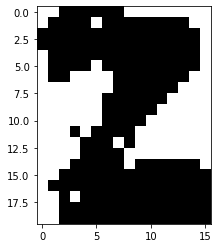

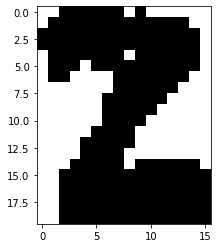

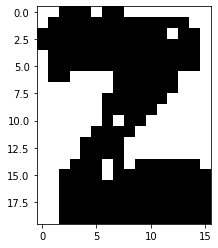

In [8]:
# Récuperons les données
digits_list = ['Z']
# X a pour format (n, p). n = 39*nbr_digits pour alphadigits et 20*16 pixels par image
X = lire_alpha_digit(digits_list)
# Numéro de pixels de l'image
p = X.shape[1]
# numero de classes
#q = len(digits_list)
q = 100
# Initializer le RBM 
rbm_unit = init_RBM(p, q)
# train 
trained_rbm = train_RBM(rbm_unit, X, epochs=500, learning_rate=0.1, batch_size=3, cd_k=1)
# Reconstruisons les images 
generer_image_RBM(trained_rbm, nbr_iterations_gibbs=1000, nbr_images=3, image_shape=(20, 16))

# Miscellaneous

In [6]:
digits_list = ['A', 'B', 'C']
data = lire_alpha_digit(digits_list)
#data[0][38].flatten().shape

File already downloaded, using version in data folder..


In [7]:
data.shape

(117, 320)

In [54]:
np.stack(data[0]).reshape(-1, 20*16).shape

(39, 320)

In [58]:
np.stack(data, axis=0).shape#.reshape(-1, 20*16).shape

(2, 39)

In [59]:
alphadigs_dict = sio.loadmat('data/binaryalphadigs.mat')

# filter digits
digit2idx = {}
for i, digit in enumerate(alphadigs_dict['classlabels'][0]):
    digit2idx[digit[0]] = i

# collect indexes 
idxs = []
for digit in digits_list:
    idxs.append(digit2idx[digit])


In [66]:
alphadigs_dict['dat'][[0 , 1]].shape

(2, 39)

In [78]:
np.stack(np.concatenate(alphadigs_dict['dat'][[0 , 1]])).reshape(-1, 20*16).shape

(78, 320)

In [72]:
idx = 0
ans = []
for idx in [1, 2]:
    if ans == None:
        ans.append(np.stack(alphadigs_dict['dat'][idx]).reshape(-1, 20*16)#.shape
    else:
        ans.vstack(np.stack(alphadigs_dict['dat'][idx]).reshape(-1, 20*16))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [37]:
old_X = X.copy()

In [39]:
np.random.shuffle(X)

In [40]:
X == old_X

array([[False, False, False, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True, False, False],
       [ True,  True,  True, ...,  True, False, False],
       ...,
       [ True,  True,  True, ..., False, False,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True, False, False, ...,  True,  True,  True]])

In [43]:
old_X.shape

(78, 320)

In [ ]:
(39*320)

In [4]:
data = np.random.binomial(1, 0.5, size=(10, p))

In [5]:
rbm.train_RBM(data, epochs=10, learning_rate=0.01, batch_size=3, cd_k=1)

Epoch: 0 -- Erreur de reconstruction: 1.5555555555555554
Epoch: 1 -- Erreur de reconstruction: 1.5213675213675213
Epoch: 2 -- Erreur de reconstruction: 1.4700854700854702
Epoch: 3 -- Erreur de reconstruction: 1.4871794871794872
Epoch: 4 -- Erreur de reconstruction: 1.5128205128205128
Epoch: 5 -- Erreur de reconstruction: 1.5128205128205128
Epoch: 6 -- Erreur de reconstruction: 1.393162393162393
Epoch: 7 -- Erreur de reconstruction: 1.4102564102564101
Epoch: 8 -- Erreur de reconstruction: 1.4957264957264957
Epoch: 9 -- Erreur de reconstruction: 1.4529914529914532


In [ ]:
%debug

> <ipython-input-95-39f8c0fcf939>(44)sortie_entree_RBM()
     42         Sort entree data reconstruit de dimension (nxp)
     43         """
---> 44         p_v_donne_h = sigmoid(data_h@W.T + self.a)
     45         # return bernoulli distribution for the sampled probabilities
     46         reconstructed_data = np.random.binomial(1, p_v_donne_h, size=None)



ipdb>  data_h.shape


(3, 1)


ipdb>  W.shape


(5, 9)


In [90]:
p_h_donne_v, data_h = rbm.entree_sortie_RBM(data)

In [91]:
p_h_donne_v

array([[0.51860491],
       [0.63203543],
       [0.76837851],
       [0.58791993],
       [0.68272626],
       [0.69052153],
       [0.65164299],
       [0.57632981],
       [0.70930957],
       [0.64456906]])

In [92]:
data_h

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1]])

In [68]:
np.sum(a)

-2.348130775342886

In [ ]:
def DBN:
    def __init__(self):
        pass
    def init_DBN(self):
        pass
    def pretrain_DNN(self)
    
    
        

In [14]:
import numpy as np
.mean()

-2.63139536837038e-05

In [71]:
np.random.normal(loc=0, scale=0.1, size=(p, q))

array([[-0.05214187],
       [ 0.07012625],
       [ 0.09959477],
       [ 0.01163886],
       [-0.04875912],
       [ 0.23321488],
       [-0.00292611],
       [-0.03002914],
       [-0.06346839],
       [-0.15519526],
       [ 0.06355991],
       [-0.11859925],
       [-0.04515475],
       [ 0.0032718 ],
       [ 0.01602887],
       [ 0.19101388],
       [ 0.18414055],
       [-0.10312725],
       [-0.20965412],
       [ 0.15623735],
       [-0.01891943],
       [-0.01666451],
       [ 0.08122356],
       [ 0.15262467],
       [-0.07095568],
       [-0.06893115],
       [ 0.01637673],
       [ 0.07048092],
       [ 0.05554803],
       [-0.07199344],
       [ 0.12674552],
       [-0.01500956],
       [-0.12023044],
       [-0.05780861],
       [-0.02066452],
       [-0.00823631],
       [ 0.23315604],
       [-0.07771179],
       [-0.12112403]])

In [16]:
np.zeros((1, 10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [59]:
data_h

array([[1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 1, 1, 0, 1, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 1, 1, 1, 1, 0],
       [0, 1, 0, 0, 1, 1, 1, 1, 0],
       [1, 1, 0, 0, 1, 1, 1, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 1, 0, 0, 1]])

In [64]:
p_v_donne_h = sigmoid(data_h@W.T + a)
# return bernoulli distribution for the sampled probabilities 
reconstructed_data = np.random.binomial(1, p_v_donne_h, size=None)
reconstructed_data.shape

(10, 5)

In [77]:
np.random.binomial(1, 0.5, size=(10, p))

(10, 39)

In [35]:
p = 5
q = 9
x = np.random.randn(10, p)
a = np.random.randn(1, p)
b = np.random.randn(1, q)
W = np.random.randn(p, q)

In [38]:
sigmoid(x)

array([[0.44807423, 0.922243  , 0.27139376, 0.59325034, 0.74411231],
       [0.3345052 , 0.3706395 , 0.32592071, 0.26898638, 0.6784325 ],
       [0.22591937, 0.22904465, 0.33220585, 0.12146756, 0.53269372],
       [0.63990301, 0.27651585, 0.60456779, 0.36659139, 0.19768871],
       [0.61790696, 0.39954692, 0.50753818, 0.61715851, 0.76067089],
       [0.31043638, 0.39408641, 0.09740038, 0.54403384, 0.20173695],
       [0.11999641, 0.53870227, 0.37291058, 0.46362032, 0.37312552],
       [0.23465812, 0.45551946, 0.58646431, 0.52538235, 0.51127102],
       [0.52457743, 0.73536737, 0.54612009, 0.46783358, 0.6927917 ],
       [0.69488557, 0.64643543, 0.30012612, 0.34986211, 0.71967344]])

In [56]:
p_h_donne_v = sigmoid(x@W + b)
# return bernoulli distribution for the sampled probabilities 
data_h = np.random.binomial(1, p_h_donne_v, size=None)

In [61]:
(data_h @ W.T).shape

(10, 5)

In [40]:
x + a

array([[-1.18209332,  1.16150467, -1.0494074 ,  0.47911461,  0.96482544],
       [-1.66151709, -1.84118986, -0.7885383 , -0.8980753 ,  0.64394958],
       [-2.20513653, -2.525429  , -0.76006987, -1.87690951,  0.02833381],
       [-0.39869547, -2.27352599,  0.36268974, -0.44517181, -1.50343097],
       [-0.49296494, -1.7190688 , -0.03168969,  0.57920089,  1.05373322],
       [-1.77171865, -1.74188272, -2.28829365,  0.27828892, -1.47810146],
       [-2.96610284, -1.15659615, -0.58159519, -0.04408028, -0.62145938],
       [-2.15583166, -1.49010927,  0.28752327,  0.20331281, -0.05753622],
       [-0.87524967, -0.28968788,  0.12316154, -0.02714758,  0.71057545],
       [-0.1505784 , -0.70830832, -0.90854207, -0.51794931,  0.84021442]])

In [53]:
(x@W + b).shape

(10, 9)

In [55]:
sigmoid(x@W + b)

(10, 9)

In [46]:
np.tile(a, (x.shape[0], p)).shape

(10, 25)

In [47]:
x.shape

(10, 5)

In [48]:
x

array([[-0.20845464,  2.47322019, -0.98756269,  0.37741856,  1.06745337],
       [-0.68787841, -0.52947434, -0.7266936 , -0.99977136,  0.7465775 ],
       [-1.23149785, -1.21371348, -0.69822516, -1.97860557,  0.13096173],
       [ 0.57494322, -0.96181047,  0.42453444, -0.54686787, -1.40080304],
       [ 0.48067374, -0.40735329,  0.03015502,  0.47750484,  1.15636115],
       [-0.79807997, -0.4301672 , -2.22644895,  0.17659287, -1.37547354],
       [-1.99246415,  0.15511937, -0.51975049, -0.14577633, -0.51883146],
       [-1.18219297, -0.17839375,  0.34936797,  0.10161675,  0.0450917 ],
       [ 0.09838901,  1.02202764,  0.18500625, -0.12884363,  0.81320337],
       [ 0.82306028,  0.6034072 , -0.84669736, -0.61964536,  0.94284234]])